### Classification: Cats or Dogs?
This Python script builds an image classifier using a **tf.keras.Sequential** model and load data using **tf.keras.preprocessing.image.ImageDataGenerator**. code is adapted from https://www.tensorflow.org/tutorials/images/classification 

### Step 1. Load packages and data.
* The **os** package is used to read files and directory structure, 

* **NumPy** is used to convert python list to numpy array and to perform required matrix operations and 

* **matplotlib.pyplot** to plot the graph and display images in the training and validation data.

In [1]:
 ##prepare data; 
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as keras
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL as PIL
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
#path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True,cache_dir="C:/Users/29578/Downloads/penn state/2020 Spring/PHS 597 Deep Learning/data/")
path_to_zip = "C:/Users/29578/Downloads/penn state/2020 Spring/PHS 597 Deep Learning/data/"
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [2]:
##setting the dir of the datasets; 
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

### Step 2. Understand the data
number of training images and testing images

In [3]:
#take a peek at the data; 
print("# of cats images in training:",len(os.listdir(train_cats_dir)))
print("# of dogs images in training:",len(os.listdir(train_dogs_dir)))
print("# of cats images in validation:",len(os.listdir(validation_cats_dir)))
print("# of dogs images in validation:",len(os.listdir(validation_dogs_dir)))

# of cats images in training: 1000
# of dogs images in training: 1000
# of cats images in validation: 500
# of dogs images in validation: 500


### Step 3. Data Preparation
**ImageDataGenerator** class provided by **tf.keras** can format the images into appropriately pre-processed floating point tensors before feeding to the network:

1. Read images from the disk.

2. Decode contents of these images and convert it into proper grid format as per their RGB content.

3. Convert them into floating point tensors.

4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

In [4]:
#set up variables to use
batch_size = 1000 #number of training samples used in one iteration
epochs = 15 #An epoch is one complete presentation of the data set to be learned to a learning machine
IMG_HEIGHT = 150
IMG_WIDTH = 150

#load images using ImageDataGenerator; 
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
#flow_from_directory method load images from the disk, applies rescaling, and resizes the images into the required dimensions
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
validation_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


(1000, 150, 150, 3)
(1000,)


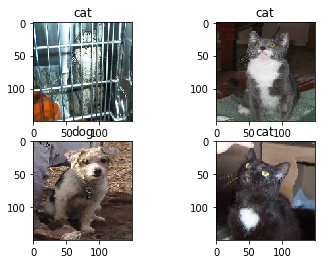

In [5]:
#show one image:
sample_training_images, sample_training_labels = next(train_data_gen) #next returns a batch of datasets
sample_validation_images, sample_validation_labels = next(validation_data_gen)
print(sample_training_images.shape) #1000 images, each with size 150*150, 3 chanels
print(sample_training_labels.shape)
fig, axs = plt.subplots(2,2)
cat_dog = ['cat', 'dog']
for ii in np.arange(0,2):
    for jj in np.arange(0,2):
        axs[ii,jj].imshow(sample_training_images[ii*2+jj,:,:,:])
        axs[ii,jj].title.set_text(cat_dog[int(sample_training_labels[ii*2+jj])])

In [5]:
## how did a simple model do here: 
import tensorflow.keras as keras
from keras import models
from keras import layers
sample_training_images, sample_training_labels = next(train_data_gen)
sample_validation_images, sample_validation_labels = next(validation_data_gen)
sample_training_images = sample_training_images.reshape((1000, 150 * 150 *3))
sample_training_images0 = sample_training_images.astype('float32') / 255
sample_validation_images = sample_validation_images.reshape((1000, 150 * 150 *3))
sample_validation_images0 = sample_validation_images.astype('float32') / 255
from keras.utils import to_categorical
sample_training_labels0 = to_categorical(sample_training_labels)
sample_validation_labels0 = to_categorical(sample_validation_labels)
print(sample_training_images0.shape)
print(sample_training_labels0.shape)

Using TensorFlow backend.


(1000, 67500)
(1000, 2)


Fit a Naive Neural Network **accuracy=0.543**

In [15]:
#fit the mdoel 
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(150*150*3,)))
network.add(layers.Dense(2, activation='softmax'))
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
network.fit(sample_training_images_0, sample_training_labels_0, epochs=5, batch_size=128)

Epoch 1/5
1000/1000 [==============================] - 22s 22ms/step - loss: 0.8875 - acc: 0.5000
Epoch 2/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7026 - acc: 0.5240
Epoch 3/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6891 - acc: 0.5500
Epoch 4/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7011 - acc: 0.5240
Epoch 5/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7045 - acc: 0.5440


In [17]:
import random
random.seed(1)
np.random.seed(1)
test_loss, test_acc = network.evaluate(sample_validation_images_0, sample_validation_labels_0)
print(test_acc)

1000/1000 [==============================] - 2s 2ms/step
0.543


## Step 4. Fit three models

### 1.1 Logistic regression (binary)
1. Fit logistic regression as NN with one layer, activation function of output layer is sigmoid. **accuracy=0.521**
    * Self defined loss function is $log(1+exp(-\hat{y}*y))$

2. Fit traditional logistic regression with existing packages. **accuracy=0.632**

In [45]:
import keras.backend as K
def loss_logit(y_actual,y_predicted):
    loss = K.log(1+K.exp(-(y_actual*y_predicted)))
    return(loss)

In [46]:
#fit the mdoel 
netlogit = models.Sequential()
netlogit.add(layers.Dense(1, activation='sigmoid'))
netlogit.compile(optimizer='rmsprop',loss=loss_logit,metrics=['accuracy'])
netlogit.fit(sample_training_images0, sample_training_labels, epochs=5, batch_size=128)

import random
random.seed(1)
np.random.seed(1)
test_loss, test_acc = netlogit.evaluate(sample_validation_images0, sample_validation_labels)
print(test_acc)

Epoch 1/5
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5500 - acc: 0.5100
Epoch 2/5
1000/1000 [==============================] - 0s 414us/step - loss: 0.5237 - acc: 0.4960
Epoch 3/5
1000/1000 [==============================] - 0s 380us/step - loss: 0.5160 - acc: 0.4960
Epoch 4/5
1000/1000 [==============================] - 0s 417us/step - loss: 0.5121 - acc: 0.4960
Epoch 5/5
1000/1000 [==============================] - 6s 6ms/step
0.521


In [48]:
random.seed(1)
np.random.seed(1)
clf = LogisticRegression(penalty='none', solver='saga', tol=0.1,multi_class="ovr")#"auto")
# C: inverse of regulation strength.solver: optimization algorithm. tol: tolerance for stopping criteria.
print("Train model")
clf.fit(sample_training_images0, sample_training_labels)
print("Compute predictions")
test_pred_clf = clf.predict(sample_validation_images0)
print("Accuracy: ", metrics.accuracy_score(sample_validation_labels, test_pred_clf))

Train model
Compute predictions
Accuracy:  0.632


### 1.2 Logistic regression (multinomial)
1. Fit logistic regression as NN with one layer, activation function of output layer is softmax and dense=2. **accuracy=0.554**

2. Fit traditional multinomial logistic regression with existing packages. **accuracy=0.651**

In [39]:
#fit the mdoel 
netmult = models.Sequential()
netmult.add(layers.Dense(2, activation='softmax'))
netmult.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
netmult.fit(sample_training_images0, sample_training_labels0, epochs=5, batch_size=128)

import random
random.seed(1)
np.random.seed(1)
test_loss, test_acc = netmult.evaluate(sample_validation_images0, sample_validation_labels0)
print(test_acc)

Epoch 1/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6986 - acc: 0.4940
Epoch 2/5
1000/1000 [==============================] - 0s 431us/step - loss: 0.6892 - acc: 0.5400
Epoch 3/5
1000/1000 [==============================] - 0s 469us/step - loss: 0.6873 - acc: 0.5340
Epoch 4/5
1000/1000 [==============================] - 0s 412us/step - loss: 0.6925 - acc: 0.5170
Epoch 5/5
1000/1000 [==============================] - 1s 639us/step
0.554


In [40]:
random.seed(1)
np.random.seed(1)
mult = LogisticRegression(penalty='none', solver='saga', tol=0.1,multi_class="multinomial")#"auto")
# C: inverse of regulation strength.solver: optimization algorithm. tol: tolerance for stopping criteria.
print("Train model")
mult.fit(sample_training_images0, sample_training_labels)
print("Compute predictions")
test_pred_mult = mult.predict(sample_validation_images0)
print("Accuracy: ", metrics.accuracy_score(sample_validation_labels, test_pred_mult))

Train model
Compute predictions
Accuracy:  0.651


### 2. Linear Regression
1. Fit linear regression as a NN with one layer, activation function of output layer is linear function. **accuracy=0.606**

2. Fit traditional linear regression with existing package. **accuracy=0.632**

3. Fit a Ridge Classifier with $\alpha=0$ is claimed to be the same as fitting a linear regression. **accuracy=0.776**
   * Ridge Classifier first revalue the binary outcome to $-1$ and $1$, then perform the regression with sum of least square as the loss function. 
   * Cut-off value for classification is 0.

In [47]:
#fit the mdoel 
netlr = models.Sequential()
netlr.add(layers.Dense(2, activation='linear'))
netlr.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['accuracy']) #default: MSE
netlr.fit(sample_training_images0, sample_training_labels0, epochs=5, batch_size=128)

import random
random.seed(1)
np.random.seed(1)
test_loss, test_acc = netlr.evaluate(sample_validation_images0, sample_validation_labels0)
print(test_acc)

Epoch 1/5
1000/1000 [==============================] - 8s 8ms/step - loss: 0.2955 - acc: 0.4880
Epoch 2/5
1000/1000 [==============================] - 1s 670us/step - loss: 0.2612 - acc: 0.5420
Epoch 3/5
1000/1000 [==============================] - 1s 517us/step - loss: 0.2576 - acc: 0.5400
Epoch 4/5
1000/1000 [==============================] - 1s 739us/step - loss: 0.2595 - acc: 0.5470
Epoch 5/5
1000/1000 [==============================] - 9s 9ms/step
0.606


In [8]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LinearRegression

#revalue the binaty outcome to -1 and 1 to get a better estimates.
sample_training_labels1 = np.where(sample_training_labels==0, -1, sample_training_labels)
print(sample_training_labels[1:10])
print(sample_training_labels1[1:10])

[0. 0. 1. 1. 1. 1. 1. 0. 1.]
[-1. -1.  1.  1.  1.  1.  1. -1.  1.]


In [39]:
random.seed(1)
np.random.seed(1)
lr = LinearRegression()
#lr = RidgeClassifier(alpha=0.) 
print("Train model")
lr.fit(sample_training_images0, sample_training_labels)
print("Compute predictions")
test_pred_lr = lr.predict(sample_validation_images0)
test_pred_lr1 = np.where(test_pred_lr>0,1,0)
print("Accuracy: ", metrics.accuracy_score(sample_validation_labels, test_pred_lr1))

Train model
Compute predictions
Accuracy:  0.632


In [45]:
random.seed(1)
np.random.seed(1)
lr = RidgeClassifier(alpha=0.) 
print("Train model")
lr.fit(sample_training_images0, sample_training_labels)
print("Compute predictions")
test_pred_lr_rig = lr.predict(sample_validation_images0)
print("Accuracy: ", metrics.accuracy_score(sample_validation_labels, test_pred_lr_rig))

Train model


C:\Users\29578\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.70298e-10): result may not be accurate.
  overwrite_a=False)


Compute predictions
Accuracy:  0.776


### 3. Optimal Separating Hyperplane (SVC)
1. Fit linear regression as a NN with one layer, activation function of output layer is **linear/identity function**, and optimization algorithm is **adadelta**. 
**accuracy=0.555**
   * Loss function is hinge loss function: $ max\{0,1-\hat{y}*y\} $

2. Fit traditional linear regression with existing package. **accuracy=0.59**

In [57]:
#fit the mdoel 
netlogit = models.Sequential()
netlogit.add(layers.Dense(2, activation='linear'))
netlogit.compile(optimizer='adadelta',loss='hinge',metrics=['accuracy'])
netlogit.fit(sample_training_images0, sample_training_labels0, epochs=5, batch_size=300)

import random
random.seed(1)
np.random.seed(1)
test_loss, test_acc = netlogit.evaluate(sample_validation_images0, sample_validation_labels0)
print(test_acc)

Epoch 1/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.9682 - acc: 0.5050
Epoch 2/5
1000/1000 [==============================] - 0s 355us/step - loss: 0.8639 - acc: 0.5020
Epoch 3/5
1000/1000 [==============================] - 0s 363us/step - loss: 0.7593 - acc: 0.5020
Epoch 4/5
1000/1000 [==============================] - 0s 441us/step - loss: 0.6575 - acc: 0.5250
Epoch 5/5
1000/1000 [==============================] - 5s 5ms/step
0.555


In [50]:
from sklearn.svm import SVC

random.seed(1)
np.random.seed(1)
sh = SVC(kernel='linear',C=1)
#C: penalty parameter of erroe term

print("Train model")
sh.fit(sample_training_images0, sample_training_labels)
print("Compute predictions")
test_pred_sh = sh.predict(sample_validation_images0)
print("Accuracy: ", metrics.accuracy_score(sample_validation_labels, test_pred_sh))


Train model
Compute predictions
Accuracy:  0.59


#### Explore: Set dense=2/1?
sample_training_labels and sample_validation_labels have dimension (XXX, 1) should be used for ML methods (i.e. existing package for logistic regerssion, linear regression, and SVC). 

sample_training_labels0 and sample_validation_labels0 have dimension (XXX, 2) should be used for NN with dense=2 for output layer. 

* Dense = 2, means dimension of output = 2. treat as multinomial, softmax activation function
* Dense = 2, means dimension of output = 1. treat as binomial, sigmoid activation function

In [15]:
#fit the mdoel 
netlogit = models.Sequential()
netlogit.add(layers.Dense(1, activation='linear'))
netlogit.compile(optimizer='adadelta',loss='hinge',metrics=['accuracy'])
netlogit.fit(sample_training_images0, sample_training_labels, epochs=5, batch_size=300)

import random
random.seed(1)
np.random.seed(1)
test_loss, test_acc = netlogit.evaluate(sample_validation_images0, sample_validation_labels)
print(test_acc)

Epoch 1/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.9455 - acc: 0.4980
Epoch 2/5
1000/1000 [==============================] - 0s 419us/step - loss: 0.7595 - acc: 0.5200
Epoch 3/5
1000/1000 [==============================] - 0s 425us/step - loss: 0.5958 - acc: 0.5010
Epoch 4/5
1000/1000 [==============================] - 0s 411us/step - loss: 0.5344 - acc: 0.4820
Epoch 5/5
1000/1000 [==============================] - 1s 709us/step
0.426
